![AES & CEE Masthead](https://kyrill.ias.sdsmt.edu/wjc/eduresources/AES_CEE_Masthead.png)
# Accessing the THREDDS Holdings (Time Series for an aggregated region).

# Libraries

In [44]:
#################################################
#
# Library 
#

import numpy             as np
import matplotlib        as mpl
import matplotlib.pyplot as plt

import xarray            as xr

import pandas            as pd

import cartopy.crs       as ccrs
import cartopy.feature   as cfeature


import datetime          as datetime


#
#################################################

# Accessing Metadata and Masks

Metadata and Masks are kept in a NetCDF Files on the TDS service.  This is a rather large file compared to the LOCA2 Files.  

In [45]:
#################################################
#
# Pull Mask for NLDAS 
#

nldas_mask = xr.open_dataset("http://kyrill.ias.sdsmt.edu:8080/thredds/dodsC/NLDAS/NLDAS_METADATA.nc")






#
#################################################


nldas_mask["HUC_08"] = nldas_mask["HUC_08"].astype("int32")
nldas_mask["huc08"]  = nldas_mask["huc08"].astype("int32")
nldas_mask["huc06"]  = nldas_mask["huc06"].astype("int32")
nldas_mask["huc04"]  = nldas_mask["huc04"].astype("int32")
nldas_mask["huc02"]  = nldas_mask["huc02"].astype("int32")

nldas_mask["CLIMDIV"]            = nldas_mask["CLIMDIV"].astype("int32")
nldas_mask["climdiv"]            = nldas_mask["climdiv"].astype("int32")
nldas_mask["climdiv_state_code"] = nldas_mask["climdiv_state_code"].astype("int32")
nldas_mask["fips_cd"]            = nldas_mask["fips_cd"].astype("int32")
nldas_mask["cdnew"]              = nldas_mask["cdnew"].astype("int32")

nldas_mask["HUC_08"] = nldas_mask["HUC_08"].where(cond = nldas_mask["HUC_08"]>0,other=np.nan)
nldas_mask["CLIMDIV"] = nldas_mask["CLIMDIV"].where(cond = nldas_mask["CLIMDIV"]>0,other=np.nan)


In [90]:
nldas_mask

<xarray.Dataset> Size: 10MB
Dimensions:                                                   (lon: 464,
                                                               lat: 224,
                                                               soil_depth: 4,
                                                               bnds: 2,
                                                               huc08: 2181,
                                                               climdiv: 344)
Coordinates:
  * lon                                                       (lon) float32 2kB ...
  * lat                                                       (lat) float32 896B ...
  * soil_depth                                                (soil_depth) float32 16B ...
  * huc08                                                     (huc08) int32 9kB ...
  * climdiv                                                   (climdiv) int32 1kB ...
Dimensions without coordinates: bnds
Data variables: (12/52)
    soil_depth_bnds                                           (soil_depth, bnds) float32 32B ...
    soil_thickness                                            (soil_depth) float32 16B ...
    huc06                                                     (huc08) int32 9kB ...
    huc04                                                     (huc08) int32 9kB ...
    huc02                                                     (huc08) int32 9kB ...
    huc08_name                                                (huc08) |S64 140kB ...
    ...                                                        ...
    NLDAS_elev_min                                            (lat, lon) float32 416kB ...
    NLDAS_slope                                               (lat, lon) float32 416kB ...
    NLDAS_aspect                                              (lat, lon) float32 416kB ...
    HYDRO_mask                                                (lat, lon) int32 416kB ...
    HUC_08                                                    (lat, lon) float64 831kB ...
    CLIMDIV                                                   (lat, lon) float64 831kB ...
Attributes: (12/21)
    CDI:                             Climate Data Interface version 2.4.0 (ht...
    Conventions:                     CF-1.0
    institution:                     NASA GSFC
    missing_value:                   -9999.0
    time_definition:                 constant
    title:                           NLDAS Noah LSM soil parameter values
    ...                              ...
    CDO:                             Climate Data Operators version 2.4.0 (ht...
    Source_Software:                 Esri ArcGIS
    DODS_EXTRA.Unlimited_Dimension:  time
    EXTRA_DIMENSION.time:            0
    DODS.strlen:                     64
    DODS.dimName:                    maxStrlen64

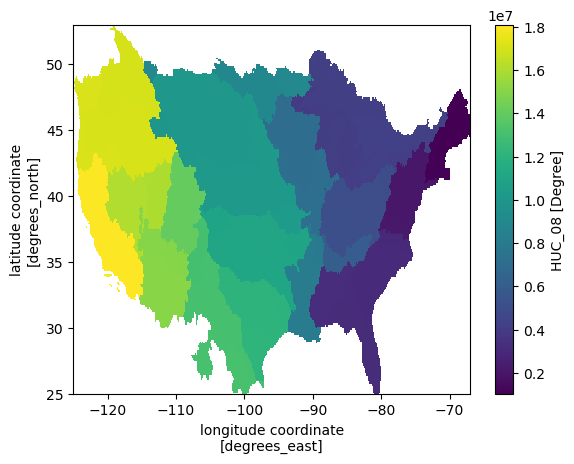

In [47]:
nldas_mask["HUC_08"].plot()

# User Modification Area

This controls a required polygon, start, and end date

Here, we are only looking at the total Yellowstone basin.  (We have HUC levels form 02, 04, 06, and 08).

In [53]:
#################################################
#
# User Modification Area
#

# Mask Variable

Mask_Variable = "huc04" # Level 2 river basins (4-digits)
Mask_Lookup   =    1007 # Yellowstone Basin.

# Start Date & Stop Dates

start_date = "2017-01-01"
stop_date  = "2023-12-31"

#
#################################################

# Process Mask

In [152]:
#################################################
#
# User Modification Area
#

# Mask Variable and Lookup Tables

if ("huc" in Mask_Variable):
    print("Mask Uses Hydrologic Boundaries")
    master_mask      = nldas_mask["HUC_08"].copy()
    master_mask_vals = np.unique(master_mask.values)    

    if (Mask_Lookup > 1000000):
        mask_index      = nldas_mask["huc08"].copy()
        mask_index_vals = mask_index.coords["huc08"].values        
        print("  Selecting Mask ", str(Mask_Lookup).zfill(8))
    elif (Mask_Lookup > 10000):
        mask_index      = nldas_mask["huc06"].copy()
        mask_index_vals = ask_index.coords["huc08"].values        
        print("  Selecting Mask ", str(Mask_Lookup).zfill(6))
    elif (Mask_Lookup > 100):
        mask_index      = nldas_mask["huc04"].copy()
        mask_index_vals = mask_index.coords["huc08"].values     
        print("  Selecting Mask ", str(Mask_Lookup).zfill(4))
    else:
        mask_index      = nldas_mask["huc02"].copy()
        mask_index_vals = mask_index.coords["huc08"].values       
        print("  Selecting Mask ", str(Mask_Lookup).zfill(2))
else:
    master_mask      = nldas_mask["CLIMDIV"].copy()
    mask_index       = nldas_mask["climdiv"].copy()
    master_mask_vals = np.unique(master_mask.values)       
    mask_index_vals  = mask_index.coords["climdiv"].values      
    print("Mask uses NCEI Regions ", str(Mask_Lookup).zfill(4))



#
#################################################

Mask Uses Hydrologic Boundaries
  Selecting Mask  1007


<xarray.DataArray 'huc04' (huc08: 2181)> Size: 9kB
[2181 values with dtype=int32]
Coordinates:
  * huc08    (huc08) int32 9kB 1010009 1010011 1010004 ... 18010101 18010206
Attributes:
    long_name:    USGS Hydrologic Unit Level 4 Codes
    description:  USGS Hydrologic Unit Level 4 Codes

In [154]:
nldas_mask.dims["huc08"]

<xarray.DataArray 'huc08' (huc08: 2181)> Size: 9kB
array([ 1010009,  1010011,  1010004, ..., 18040014, 18010101, 18010206],
      dtype=int32)
Coordinates:
  * huc08    (huc08) int32 9kB 1010009 1010011 1010004 ... 18010101 18010206
Attributes:
    description:  USGS Hydrologic Unit Level 8 Codes
    long_name:    USGS Hydrologic Unit Level 8 Codes

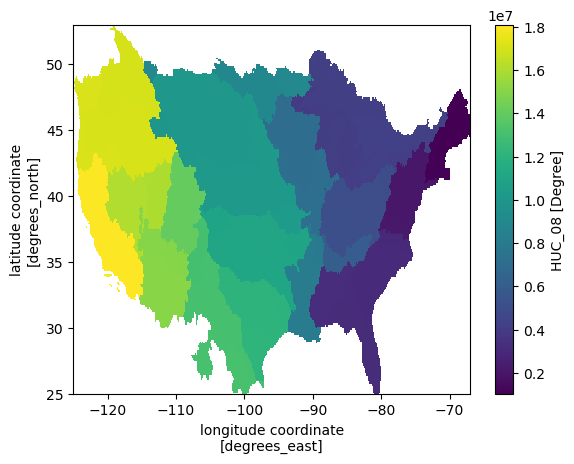

In [155]:
master_mask.plot()

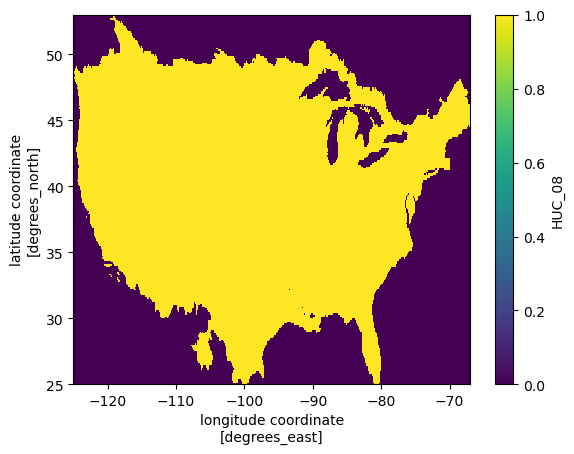

In [149]:
master_mask.isin( common_lutvals).plot()


In [150]:
#mask_index.sel(huc08=master_mask)

In [69]:
mask_index

<xarray.DataArray 'huc04' (huc08: 2181)> Size: 9kB
[2181 values with dtype=int32]
Coordinates:
  * huc08    (huc08) int32 9kB 1010009 1010011 1010004 ... 18010101 18010206
Attributes:
    long_name:    USGS Hydrologic Unit Level 4 Codes
    description:  USGS Hydrologic Unit Level 4 Codes